In [2]:
import os
import cv2
from shutil import copyfile
import matplotlib.pyplot as plt
import csv
import random
import cv2
import numpy as np
from skimage import data
from skimage import exposure
from skimage.transform import match_histograms
from models import *
import torchvision.transforms as transforms
from PIL import Image
from torch.autograd import Variable
from torchvision.utils import save_image

In [3]:
root = "/media/arg_ws3/5E703E3A703E18EB/data/mm_FCN/real_box/image/"
image_root = "/media/arg_ws3/5E703E3A703E18EB/data/mm_FCN/unity/image/"
mask_root = "/media/arg_ws3/5E703E3A703E18EB/data/mm_FCN/unity/mask/"
box_root = "/media/arg_ws3/5E703E3A703E18EB/data/mm_FCN/unity/box/"
real_box_root = "/media/arg_ws3/5E703E3A703E18EB/data/MM_BOX/train/B"
box_list = os.listdir(box_root)
real_box_list = os.listdir(real_box_root)
l = len(real_box_list)

In [25]:
for box in box_list:
    real_box_idx = random.randint(0,l-1)
    mask_name = box.split('_original.png')[0] + '_seg.png'
    #box_img = cv2.imread(os.path.join(box_root, box))
    matched = cv2.imread(os.path.join(real_box_root, real_box_list[real_box_idx]))
    image = cv2.imread(os.path.join(image_root, box))
    mask_img = cv2.imread(os.path.join(mask_root, mask_name), 0)
    mask_img[mask_img == 0] = 255
    mask_img[mask_img != 255] = 0
    mask = cv2.cvtColor(mask_img, cv2.COLOR_GRAY2RGB)
    matched = cv2.bitwise_and(matched, mask, mask=mask_img)
    mask_img[mask_img < 255] = 1
    mask_img[mask_img == 255] = 0
    mask_img[mask_img == 1] = 255
    mask = cv2.cvtColor(mask_img, cv2.COLOR_GRAY2RGB)
    image = cv2.bitwise_and(image, mask, mask=mask_img)
    result = cv2.add(matched, image)
    cv2.imwrite(os.path.join(root, box), result)

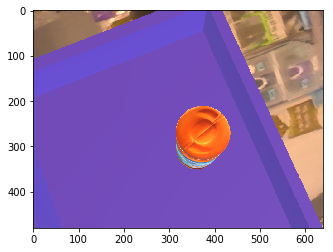

In [731]:
img1_name = "stax_116_Scene112_21_original.png"
img2_name = "viva_116_Scene8_23_original.png"

box = img1_name
mask_name = box.split('_original.png')[0] + '_seg.png'
#box_img = cv2.imread(os.path.join(box_root, box))
matched = sample_images(os.path.join(box_root, box))
image = cv2.imread(os.path.join(image_root, box))
mask_img = cv2.imread(os.path.join(mask_root, mask_name), 0)
mask_img[mask_img == 0] = 255
mask_img[mask_img != 255] = 0
mask = cv2.cvtColor(mask_img, cv2.COLOR_GRAY2RGB)
matched = cv2.bitwise_and(matched, mask, mask=mask_img)
mask_img[mask_img != 255] = 1
mask_img[mask_img == 255] = 0
mask_img[mask_img == 1] = 255
mask = cv2.cvtColor(mask_img, cv2.COLOR_GRAY2RGB)
image = cv2.bitwise_and(image, mask, mask=mask_img)
result = cv2.add(matched, image)
cv2.imwrite(os.path.join("/home/arg_ws3/Desktop/thesis/image/ssim", "e.png"), result)
plt.imshow((cv2.imread(os.path.join(image_root, box))))

In [732]:
ori = cv2.imread(os.path.join(image_root, box))
cv2.imwrite(os.path.join("/home/arg_ws3/Desktop/thesis/image/ssim", "f.png"), ori)

True